In [99]:
import pandas as pd
import numpy as np
import datetime
import time 
import scipy.stats as stats
#import matplotlib.pyplot as plt

# figures will be inside notebook
%matplotlib inline 

from bisect import bisect_left


In [100]:
df2 = pd.read_csv('celebrity-mentioned.csv',parse_dates=['date'])
clist =  df2.celebrity.unique().copy()
celebno  = 79
clist[celebno]

'taylorswift13'

In [175]:
type(df2.date.iloc[4])

pandas.tslib.Timestamp

In [176]:
temp = df2.loc[df2['celebrity'] == clist[celebno]].copy()

In [177]:
# For background tweets
alltweets = df2.loc[df2['celebrity'] == clist[celebno]].copy()
temp = 0
cutoff = 100000000000000000
temp2 = alltweets.groupby('date').size().copy()
temp_ind = temp2[temp2 < cutoff].index.get_level_values('date')
temp = alltweets[alltweets['date'].isin(temp_ind)].copy()


In [178]:
temp['date'] = pd.to_datetime(temp['date'])
temp['year'], temp['month'] = temp['date'].apply(lambda x: x.year), temp['date'].apply(lambda x: x.month)
temp['quarter'] = temp['date'].apply(lambda x: x.quarter)
year2012 = temp[temp['year'] == 2012]
temp = year2012
temp.shape

(2204, 8)

In [179]:
index = pd.DatetimeIndex(temp.date)
index2 = (index.astype(np.int64) // 10**9).values
#index3 = pd.to_datetime(index2,unit='s')
index2
for i in range(len(index2)):
    index2[i] += i

np.savetxt("index_now.csv", index2, delimiter=",",header="A")


In [180]:
fitted = pd.read_csv('fitted_intensities_now.csv', index_col=0)
fitted.index = pd.to_datetime(fitted.index,unit='s')
fitted_1day = fitted.resample('1D').sum()


In [181]:
fitted_1day.values.shape

(365, 1)

In [182]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rc('font', **{'sans-serif':'Verdana','family':'sans-serif','size':8})
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
#mpl.rcParams['axes.linewidth'] = 0.75

In [183]:
temp_counts = pd.DataFrame({'counts': np.ones(len(temp))}, index=pd.to_datetime(temp.date,unit='s'))
temp_1day = temp_counts.resample('1D').sum()
(np.nan_to_num(temp_1day.values)[:,0]).shape

#type(fitted_1day.values)

(365,)

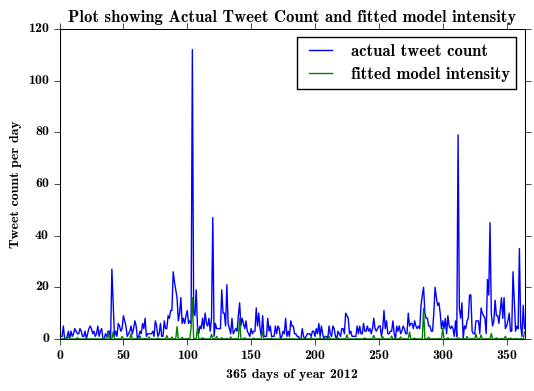

In [184]:
## empirical vs fitted
ax = pd.DataFrame({'fitted model intensity': fitted_1day.values[:,0], 'actual tweet count': np.nan_to_num(temp_1day.values)[:,0]}).plot()
#pd.DataFrame({'fitted': fitted_1day.values[:,0]}).plot()
ax.set_title("Plot showing Actual Tweet Count and fitted model intensity")
ax.set_xlabel("365 days of year 2012")
ax.set_ylabel("Tweet count per day")

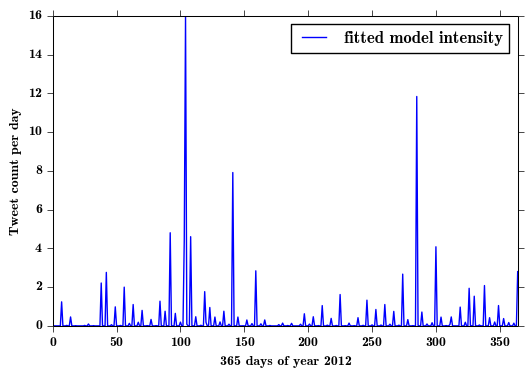

In [185]:
ax = pd.DataFrame({'fitted model intensity': fitted_1day.values[:,0]}).plot()
#pd.DataFrame({'fitted': fitted_1day.values[:,0]}).plot()
#ax.set_title("Plot showing fitted model intensity")
ax.set_xlabel("365 days of year 2012")
ax.set_ylabel("Tweet count per day")

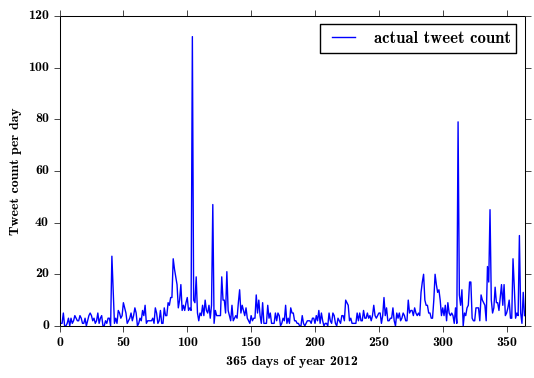

In [186]:
ax = pd.DataFrame({ 'actual tweet count': np.nan_to_num(temp_1day.values)[:,0]}).plot()
#pd.DataFrame({'fitted': fitted_1day.values[:,0]}).plot()
#ax.set_title("Plot showing Actual Tweet Count")
ax.set_xlabel("365 days of year 2012")
ax.set_ylabel("Tweet count per day")

In [187]:
residuals = pd.read_csv('residuals_now.csv', index_col=0)

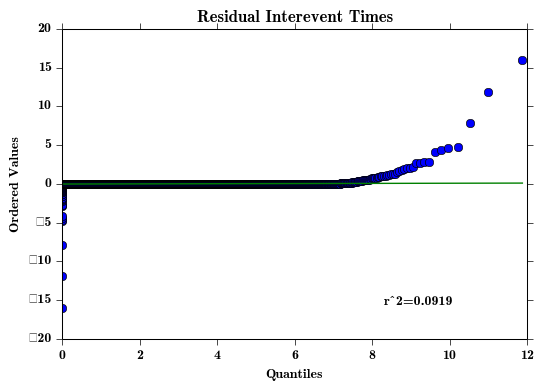

In [188]:
stats.probplot(residuals['data'].diff().dropna(), dist='expon', plot=plt, fit=True)

ax = plt.axes()
ax.set_title('Residual Interevent Times')

plt.draw()
plt.show()